In [15]:
import torch

x = torch.rand(5,3)
x

tensor([[0.2360, 0.6502, 0.4073],
        [0.4871, 0.0056, 0.3366],
        [0.6647, 0.6199, 0.5164],
        [0.7557, 0.6978, 0.7608],
        [0.0661, 0.8772, 0.3454]])

In [16]:
# print the second column
print(x[:,1])
# print the third row
print(x[2,:])

tensor([0.6502, 0.0056, 0.6199, 0.6978, 0.8772])
tensor([0.6647, 0.6199, 0.5164])


In [17]:
x = torch.randn(4,4)
print(x)
y = x.view(16)
# -1 means I don't know what to put here so figure it out
# from the other demension (can't put more than one !!!)
z = x.view(-1,8)
print(z)


tensor([[-1.1331, -0.4672, -0.9734,  1.4351],
        [ 0.3891,  0.6279, -0.8609,  0.4278],
        [ 0.8840,  0.0444,  0.4766, -1.5483],
        [ 1.5783, -0.2012,  0.9914,  0.2284]])
tensor([[-1.1331, -0.4672, -0.9734,  1.4351,  0.3891,  0.6279, -0.8609,  0.4278],
        [ 0.8840,  0.0444,  0.4766, -1.5483,  1.5783, -0.2012,  0.9914,  0.2284]])


In [18]:
# Important note : when you convert from NP to Torch and vice versa 
# Pay attention that they still have the same reference !!!!


In [19]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

import torch
import torchvision
import torchvision.transforms as transforms



# https://discuss.pytorch.org/t/understanding-transform-normalize/21730
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


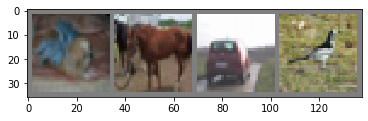

  dog horse   car  bird


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# let's show some images

def imshow(img):
    img = img / 2 + 0.5 # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
# get some random training images
dataIter = iter(trainloader)

images, labels = dataIter.next()

# show the images
imshow(torchvision.utils.make_grid(images))
#print the labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [21]:
# Using CNN
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # https://stackoverflow.com/questions/56675943/meaning-of-parameters-in-torch-nn-conv2d
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2) #nn.MaxPool2d(kernel_size, stride)
        self.conv2 = nn.Conv2d(6,16,5)
        # defining the layers, nn.Linear(in, out, bias = True)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x. view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
        
        
        

In [35]:
# Defining the loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training the network

for epoch in range(2):
    
    runningLoss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs from the list of [inputs, labels]
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        runningLoss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
             print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, runningLoss / 2000))
             runningLoss = 0.0
        
        
            
print('Finished Training')

# Note I reached paragraph 5


[1,  2000] loss: 1.188
[1,  4000] loss: 1.181
[1,  6000] loss: 1.214
[1,  8000] loss: 1.197
[1, 10000] loss: 1.143
[1, 12000] loss: 1.181
[2,  2000] loss: 1.100
[2,  4000] loss: 1.085
[2,  6000] loss: 1.089
[2,  8000] loss: 1.120
[2, 10000] loss: 1.102
[2, 12000] loss: 1.067
Finished Training


In [25]:
# save the trained model
path = './TrainedModels/cifar.pth'
torch.save(net.state_dict(), path)



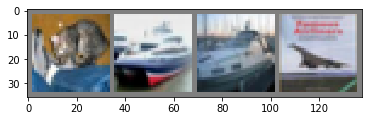

GroundTruth:    cat  ship  ship plane


In [29]:
it = iter(testloader)
images, labels = it.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]]
                                for j in range(4)))

In [34]:
net = Net()
net.load_state_dict(torch.load(path))

outputs = net(images)
# we want only the index, we don't care about the value for now
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane
